In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df = pd.read_csv('CIE_1964.csv')
df.columns = ['wavelength (nm)','x_bar10','y_bar10','z_bar10']
df.drop(df.tail(1).index,inplace=True)

In [24]:
df.head()

,wavelength (nm),x_bar10,y_bar10,z_bar10
0,380.0,0.000160,0.000017,0.000705
1,385.0,0.000662,0.000072,0.002928
2,390.0,0.002362,0.000253,0.010482
3,395.0,0.007242,0.000769,0.032344
4,400.0,0.019110,0.002004,0.086011


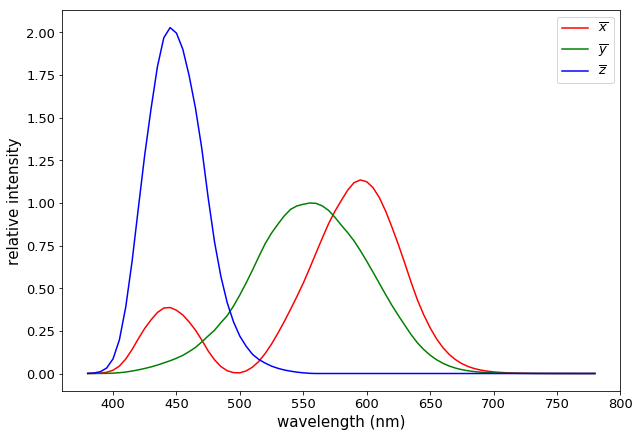

In [25]:
plt.figure(figsize = [10,7])

plt.plot(df['wavelength (nm)'], df['x_bar10'], color='red', label=r'$\overline{x}$')
plt.plot(df['wavelength (nm)'], df['y_bar10'], color='green', label=r'$\overline{y}$')
plt.plot(df['wavelength (nm)'], df['z_bar10'], color='blue', label=r'$\overline{z}$')

plt.xlabel('wavelength (nm)', fontsize=15)
plt.ylabel('relative intensity', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13)

plt.show()

In [26]:
light_source_peaks = np.arange(380,781, 10)

In [27]:
def tristimulus(light_source, df):
    X = np.sum(df[light_source] * df['x_bar10'])
    Y = np.sum(df[light_source] * df['y_bar10'])
    Z = np.sum(df[light_source] * df['z_bar10'])
    
    x = X / (X + Y + Z)
    y = Y / (X + Y + Z)
    z = Z / (X + Y + Z)
    return x, y, z

In [28]:
CIE_coordinates = []
counter = 0
for peaks in light_source_peaks:
    P = np.zeros([len(df)])
    P[counter] = 1
    df[peaks] = P
    
    x,y,z = tristimulus(peaks, df)
    CIE_coordinates.append([x,y,z])
    
    counter +=2

CIE_coordinates = np.array(CIE_coordinates)

In [29]:
df.head()

,wavelength (nm),x_bar10,y_bar10,z_bar10,380,390,400,410,420,430,...,690,700,710,720,730,740,750,760,770,780
0,380.0,0.000160,0.000017,0.000705,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,385.0,0.000662,0.000072,0.002928,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,390.0,0.002362,0.000253,0.010482,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,395.0,0.007242,0.000769,0.032344,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,400.0,0.019110,0.002004,0.086011,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


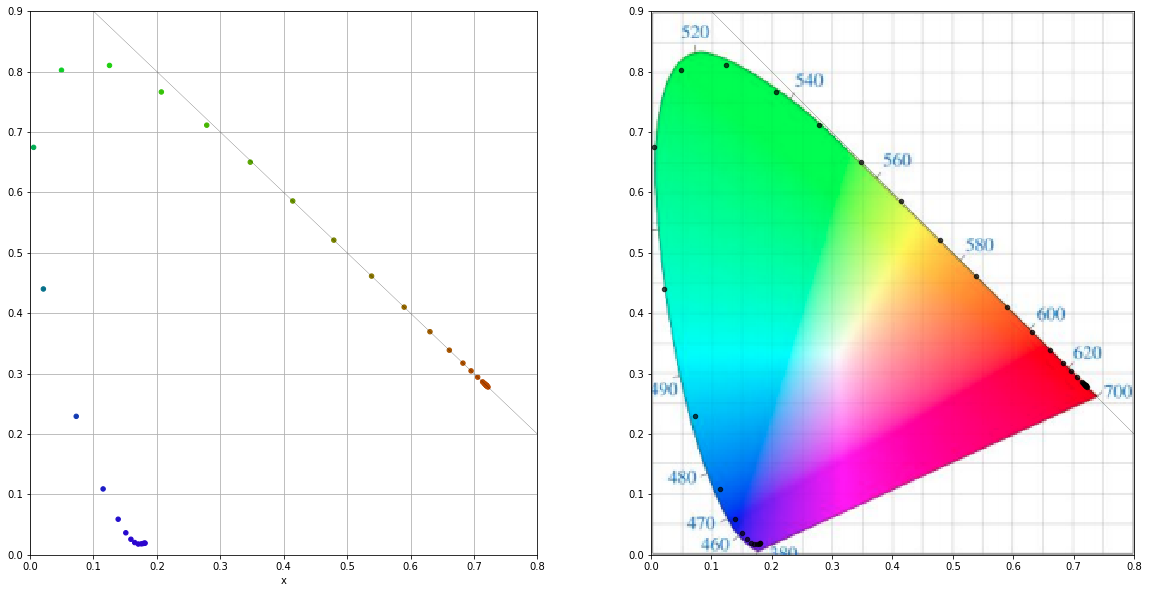

In [37]:
x = np.linspace(0,1,100)
y = 1-x

plt.figure(figsize = [20,10])
plt.subplot(121)
plt.scatter(CIE_coordinates[:,0],CIE_coordinates[:,1], s = 20, alpha = 1, color=CIE_coordinates)
plt.plot(x,y,color='black', linewidth=0.2)
plt.grid()
plt.xlabel('x')
plt.xlim(0,0.8)
plt.ylim(0,0.9)

plt.subplot(122)
plt.scatter(CIE_coordinates[:,0],CIE_coordinates[:,1], s = 20, alpha = 0.7, color='black')
plt.plot(x,y,color='black', linewidth=0.2)
ciexy = plt.imread('color-tongue.png')
plt.imshow(ciexy, extent=(0, 0.8, 0, 0.9))
plt.xlim(0,0.8)
plt.ylim(0,0.9)

plt.show()

### Blackbody

In [31]:
## blackbody = pd.read_csv('blackbody.csv')
blackbody = pd.read_csv('blackbody_not_norm.csv')
blackbody['x_bar10'] = df['x_bar10']
blackbody['y_bar10'] = df['y_bar10']
blackbody['z_bar10'] = df['z_bar10']

In [32]:
names = ['1000K','2000K','3000K','4000K','5000K','6000K','7000K','8000K','9000K','10000K']

In [33]:
blackbody.head()

,wavelength,1000K,2000K,3000K,4000K,5000K,6000K,7000K,8000K,9000K,10000K,x_bar10,y_bar10,z_bar10
0,380.0,0.527027,8.906886e+07,4.924457e+10,1.157993e+12,7.703427e+12,2.727559e+13,6.741135e+13,1.331900e+14,2.268265e+14,3.483175e+14,0.000160,0.000017,0.000705
1,385.0,0.807530,1.067078e+08,5.435132e+10,1.226740e+12,7.962760e+12,2.773795e+13,6.776715e+13,1.327528e+14,2.246062e+14,3.431374e+14,0.000662,0.000072,0.002928
2,390.0,1.222844,1.271430e+08,5.978629e+10,1.296570e+12,8.217037e+12,2.817289e+13,6.806051e+13,1.322227e+14,2.222890e+14,3.379023e+14,0.002362,0.000253,0.010482
3,395.0,1.830916,1.506989e+08,6.555304e+10,1.367347e+12,8.465864e+12,2.858055e+13,6.829383e+13,1.316057e+14,2.198852e+14,3.326260e+14,0.007242,0.000769,0.032344
4,400.0,2.711690,1.777209e+08,7.165405e+10,1.438936e+12,8.708879e+12,2.896117e+13,6.846952e+13,1.309080e+14,2.174047e+14,3.273208e+14,0.019110,0.002004,0.086011


In [34]:
CIE_coordinates_blackbody = []
counter = 0
for i in names:    
    x,y,z = tristimulus(i, blackbody)
    CIE_coordinates_blackbody.append([x,y,z])

CIE_coordinates_blackbody = np.array(CIE_coordinates_blackbody)

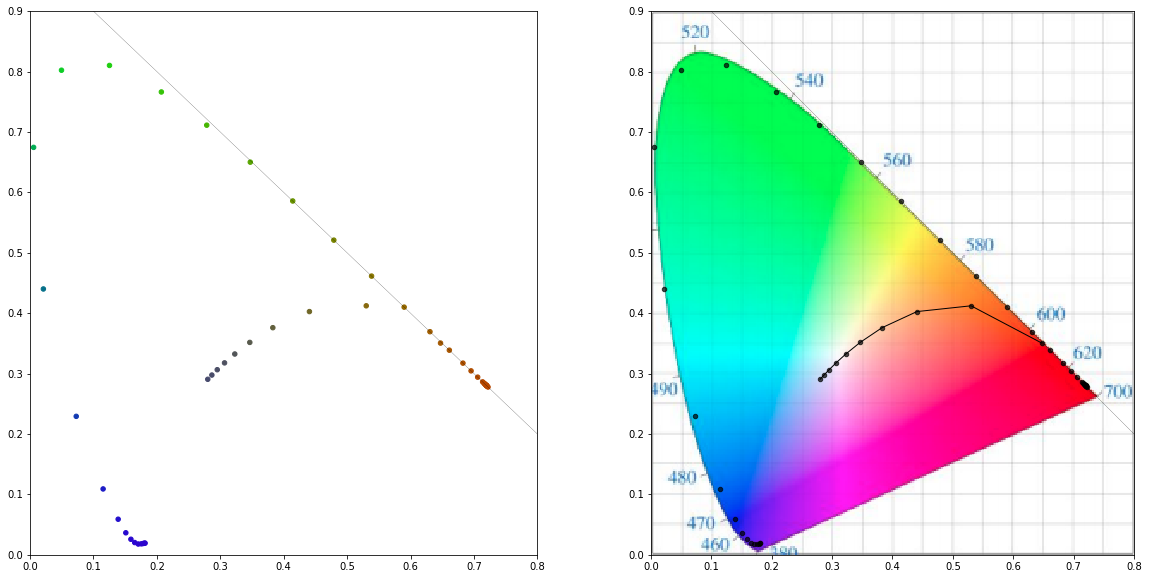

In [39]:
x = np.linspace(0,1,100)
y = 1-x

plt.figure(figsize = [20,10])
plt.subplot(121)
plt.scatter(CIE_coordinates[:,0],CIE_coordinates[:,1], s = 20, alpha = 1, color=CIE_coordinates)
plt.scatter(CIE_coordinates_blackbody[:,0],CIE_coordinates_blackbody[:,1], s = 20, alpha = 1, 
            color=CIE_coordinates_blackbody)
plt.plot(x,y,color='black', linewidth=0.2)
plt.xlim(0,0.8)
plt.ylim(0,0.9)

plt.subplot(122)
plt.plot(CIE_coordinates_blackbody[:,0],CIE_coordinates_blackbody[:,1], lw = 1, color = 'black')
plt.scatter(CIE_coordinates[:,0],CIE_coordinates[:,1], s = 20, alpha = 0.7, color='black')
plt.scatter(CIE_coordinates_blackbody[:,0],CIE_coordinates_blackbody[:,1], s = 20, alpha = 0.7, color='black')
plt.plot(x,y,color='black', linewidth=0.2)
ciexy = plt.imread('color-tongue.png')
plt.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
plt.xlim(0,0.8)
plt.ylim(0,0.9)

plt.show()

In [49]:
list(zip(CIE_coordinates[:,0],CIE_coordinates[:,1]))

[(0.18140589569161, 0.01927437641723356),
 (0.18034664426968006, 0.01931740093151103),
 (0.17838973162193697, 0.018707117852975495),
 (0.17548844587849846, 0.01813369562065866),
 (0.17063395706865261, 0.017849260487723468),
 (0.16502686388701696, 0.020282824680688157),
 (0.15902176917488814, 0.02572509698142341),
 (0.15100136132675182, 0.03643891260054143),
 (0.13892218375949747, 0.05892012478835799),
 (0.11517998454987376, 0.10903997249123866),
 (0.07277659708141503, 0.22923900377953413),
 (0.02098736112354797, 0.44011295695722197),
 (0.005586338649821766, 0.674543072339865),
 (0.0495404958677686, 0.8023021487603306),
 (0.1252362491557782, 0.8101944767952011),
 (0.20705719811618933, 0.7662817503434304),
 (0.2785876743890284, 0.711300202005862),
 (0.3472959375972994, 0.6500899660783639),
 (0.4142129165188504, 0.5857870834811496),
 (0.47903808021668215, 0.5209619197833179),
 (0.5385604754728123, 0.4614395245271877),
 (0.5899600458878912, 0.41003995411210886),
 (0.6306292153365453, 0.369

In [51]:
list(zip(CIE_coordinates_blackbody[:,0],CIE_coordinates_blackbody[:,1]))

[(0.6472897330731968, 0.3505250387105769),
 (0.5301557854432037, 0.4122442872541311),
 (0.4405488456661706, 0.4026775820957226),
 (0.3828417554904466, 0.3760253197952929),
 (0.3465250642046801, 0.3516394263137136),
 (0.3228407272636912, 0.3324429902711299),
 (0.3066793329484239, 0.31774260465401094),
 (0.2951779482950812, 0.30643190277727955),
 (0.2866900240984581, 0.2976033867953803),
 (0.2802298749859519, 0.2905959755565958)]